In [2]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
# Allow all columns to be displayed
pd.set_option('display.max_columns', 999)

In [4]:
nbadf = pd.read_csv('nba_final_dataset.csv')
nbadf.head(10)

,Unnamed: 0,Player,year_start,year_end,Year,Team,Salary,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG,career_len
0,0,Alaa Abdelnaby,1991,1995,1991,Portland Trailblazers,395000,PF,22.0,43.0,0.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.000,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,3.1,4
1,1,Alaa Abdelnaby,1991,1995,1992,Portland Trailblazers,494000,PF,23.0,71.0,1.0,934.0,13.5,0.533,0.000,0.280,9.5,20.9,15.2,4.7,1.3,1.1,14.0,20.6,0.6,1.5,2.1,0.110,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,0.000,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,6.1,4
2,2,Alaa Abdelnaby,1991,1995,1993,Boston Celtics,500000,PF,24.0,75.0,52.0,1311.0,13.2,0.551,0.002,0.245,11.0,18.1,14.6,3.0,1.0,1.2,15.6,20.5,0.7,1.3,2.0,0.074,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.000,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,7.7,4
3,3,Alaa Abdelnaby,1991,1995,1994,Boston Celtics,805000,PF,25.0,13.0,0.0,159.0,9.2,0.485,0.000,0.455,8.5,24.2,16.3,2.7,0.6,1.2,20.5,22.6,-0.2,0.1,-0.1,-0.032,-7.1,-3.1,-10.2,-0.3,24.0,55.0,0.436,0.0,0.0,0.000,24.0,55.0,0.436,0.436,16.0,25.0,0.640,12.0,34.0,46.0,3.0,2.0,3.0,17.0,20.0,64.0,4.9,4
4,4,Alaa Abdelnaby,1991,1995,1995,Sacramento Kings,650000,PF,26.0,54.0,0.0,506.0,12.6,0.519,0.009,0.152,8.7,17.4,13.1,5.0,1.5,1.8,15.4,25.6,-0.4,0.7,0.3,0.027,-4.6,-1.7,-6.3,-0.6,118.0,231.0,0.511,0.0,2.0,0.000,118.0,229.0,0.515,0.511,20.0,35.0,0.571,37.0,77.0,114.0,13.0,15.0,12.0,45.0,104.0,256.0,4.7,4
5,5,Mahmoud Abdul-Rauf,1991,2001,1991,Denver Nuggets,1660000,PG,21.0,67.0,19.0,1505.0,12.2,0.448,0.099,0.097,1.9,6.0,3.8,19.2,1.5,0.1,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,417.0,1009.0,0.413,24.0,100.0,0.240,393.0,909.0,0.432,0.425,84.0,98.0,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,14.1,10
6,6,Mahmoud Abdul-Rauf,1991,2001,1992,Denver Nuggets,2008000,PG,22.0,81.0,11.0,1538.0,12.6,0.469,0.111,0.128,1.5,6.8,4.0,21.0,1.4,0.2,11.6,26.7,-0.2,0.8,0.6,0.018,-1.7,-3.5,-5.2,-1.3,356.0,845.0,0.421,31.0,94.0,0.330,325.0,751.0,0.433,0.440,94.0,108.0,0.870,22.0,92.0,114.0,192.0,44.0,4.0,117.0,130.0,837.0,10.3,10
7,7,Mahmoud Abdul-Rauf,1991,2001,1993,Denver Nuggets,2358000,PG,23.0,81.0,81.0,2710.0,15.6,0.515,0.140,0.165,2.0,6.8,4.4,20.8,1.5,0.2,11.0,25.5,3.0,2.2,5.1,0.091,1.1,-2.1,-1.0,0.7,633.0,1407.0,0.450,70.0,197.0,0.355,563.0,1210.0,0.465,0.475,217.0,232.0,0.935,51.0,174.0,225.0,344.0,84.0,8.0,187.0,179.0,1553.0,19.2,10
8,8,Mahmoud Abdul-Rauf,1991,2001,1994,Denver Nuggets,1825000,PG,24.0,80.0,78.0,2617.0,16.7,0.521,0.104,0.179,1.2,5.8,3.6,24.1,1.6,0.2,9.9,24.9,4.4,2.4,6.8,0.125,1.6,-2.1,-0.6,0.9,588.0,1279.0,0.460,42.0,133.0,0.316,546.0,1146.0,0.476,0.476,219.0,229.0,0.956,27.0,141.0,168.0,362.0,82.0,10.0,151.0,150.0,1437.0,18.0,10
9,9,Mahmoud Abdul-Rauf,1991,2001,1995,Denver Nuggets,2200000,PG,25.0,73.0,43.0,2082.0,17.8,0.543,0.214,0.155,1.9,5.9,3.9,23.0,1.9,0.3,10.0,25.8,3.8,1.3,5.0,0.115,2.2,-2.8,-0.6,0.7,472.0,1005.0,0.470,83.0,215.0,0.386,389.0,790.0,0.492,0.511,138.0,156.0,0.885,32.0,105.0,137.0,263.0,77.0,9.0,119.0,126.0,1165.0,16.0,10


### Predicting Player Salary from Statisitical Output Using Linear Regression 

We'll begin by developing a basic linear model. We're not expecting it to be particularly successful given the large number of features. 

In our data story and exploratory data analysis, we found that certain statistics had a stronger correlation to salary than others. We'll create a dataset subset with only those columns. We'll also leave out any categorical columns for now.

In [5]:
# Create a subset of the original dataframe with only columns that have a correlation with salary. 
nbasub = nbadf.drop(['Unnamed: 0', "Player", 'year_start', 'year_end', "Team", 'Pos', 'FTr', 'ORB%', 
                     'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%'], axis=1)
nbasub.head(10)

,Year,Salary,Age,G,GS,MP,PER,TS%,3PAr,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG,career_len
0,1991,395000,22.0,43.0,0.0,290.0,13.1,0.499,0.000,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.000,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,3.1,4
1,1992,494000,23.0,71.0,1.0,934.0,13.5,0.533,0.000,20.6,0.6,1.5,2.1,0.110,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,0.000,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,6.1,4
2,1993,500000,24.0,75.0,52.0,1311.0,13.2,0.551,0.002,20.5,0.7,1.3,2.0,0.074,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.000,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,7.7,4
3,1994,805000,25.0,13.0,0.0,159.0,9.2,0.485,0.000,22.6,-0.2,0.1,-0.1,-0.032,-7.1,-3.1,-10.2,-0.3,24.0,55.0,0.436,0.0,0.0,0.000,24.0,55.0,0.436,0.436,16.0,25.0,0.640,12.0,34.0,46.0,3.0,2.0,3.0,17.0,20.0,64.0,4.9,4
4,1995,650000,26.0,54.0,0.0,506.0,12.6,0.519,0.009,25.6,-0.4,0.7,0.3,0.027,-4.6,-1.7,-6.3,-0.6,118.0,231.0,0.511,0.0,2.0,0.000,118.0,229.0,0.515,0.511,20.0,35.0,0.571,37.0,77.0,114.0,13.0,15.0,12.0,45.0,104.0,256.0,4.7,4
5,1991,1660000,21.0,67.0,19.0,1505.0,12.2,0.448,0.099,27.2,-0.7,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,417.0,1009.0,0.413,24.0,100.0,0.240,393.0,909.0,0.432,0.425,84.0,98.0,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,14.1,10
6,1992,2008000,22.0,81.0,11.0,1538.0,12.6,0.469,0.111,26.7,-0.2,0.8,0.6,0.018,-1.7,-3.5,-5.2,-1.3,356.0,845.0,0.421,31.0,94.0,0.330,325.0,751.0,0.433,0.440,94.0,108.0,0.870,22.0,92.0,114.0,192.0,44.0,4.0,117.0,130.0,837.0,10.3,10
7,1993,2358000,23.0,81.0,81.0,2710.0,15.6,0.515,0.140,25.5,3.0,2.2,5.1,0.091,1.1,-2.1,-1.0,0.7,633.0,1407.0,0.450,70.0,197.0,0.355,563.0,1210.0,0.465,0.475,217.0,232.0,0.935,51.0,174.0,225.0,344.0,84.0,8.0,187.0,179.0,1553.0,19.2,10
8,1994,1825000,24.0,80.0,78.0,2617.0,16.7,0.521,0.104,24.9,4.4,2.4,6.8,0.125,1.6,-2.1,-0.6,0.9,588.0,1279.0,0.460,42.0,133.0,0.316,546.0,1146.0,0.476,0.476,219.0,229.0,0.956,27.0,141.0,168.0,362.0,82.0,10.0,151.0,150.0,1437.0,18.0,10
9,1995,2200000,25.0,73.0,43.0,2082.0,17.8,0.543,0.214,25.8,3.8,1.3,5.0,0.115,2.2,-2.8,-0.6,0.7,472.0,1005.0,0.470,83.0,215.0,0.386,389.0,790.0,0.492,0.511,138.0,156.0,0.885,32.0,105.0,137.0,263.0,77.0,9.0,119.0,126.0,1165.0,16.0,10


In [6]:
# Shape of subset
nbasub.shape

(9621, 42)

In [7]:
# Statistical measures of all features
nbasub.describe()

,Year,Salary,Age,G,GS,MP,PER,TS%,3PAr,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG,career_len
count,9621.000000,9.621000e+03,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.00000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000,9621.000000
mean,2006.619270,3.535028e+06,26.264214,53.933271,25.594325,1254.192911,12.714416,0.506684,0.202260,18.837678,1.323948,1.260274,2.585448,0.071447,-1.588286,-0.427669,-2.015716,0.594678,191.256210,423.410976,0.435110,31.958216,90.110591,0.229821,159.297994,333.300385,0.457119,0.46889,95.425527,126.946056,0.701249,61.198212,157.969234,219.167446,111.407026,40.053009,25.874441,73.505457,112.618647,509.896165,8.025673,8.539965
std,6.894817,4.226466e+06,3.932993,24.243440,28.917554,903.012532,5.767865,0.087472,0.199258,5.199524,2.034077,1.194958,2.923337,0.092595,3.519601,2.074790,4.298589,1.347130,170.399219,367.494931,0.089515,45.339703,119.823887,0.178643,149.628485,303.779751,0.095388,0.09060,103.550686,131.309672,0.182994,62.698202,140.057846,195.903951,130.995139,34.978183,34.596601,62.836812,74.451076,462.041264,5.773495,4.503428
min,1991.000000,2.531000e+03,18.000000,1.000000,0.000000,1.000000,-90.600000,0.000000,0.000000,0.000000,-3.300000,-0.600000,-2.100000,-2.519000,-73.800000,-23.100000,-86.700000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2001.000000,7.932000e+05,23.000000,36.000000,1.000000,432.000000,9.900000,0.477000,0.009000,15.400000,0.000000,0.300000,0.300000,0.036000,-3.200000,-1.600000,-3.900000,-0.200000,50.000000,118.000000,0.399000,0.000000,2.000000,0.000000,39.000000,87.000000,0.423000,0.43800,20.000000,29.000000,0.645000,15.000000,45.000000,65.000000,20.000000,12.000000,4.000000,23.000000,47.000000,130.000000,3.500000,5.000000
50%,2007.000000,1.842000e+06,26.000000,61.000000,11.000000,1161.000000,12.900000,0.518000,0.165000,18.600000,0.600000,0.900000,1.700000,0.079000,-1.400000,-0.400000,-1.600000,0.100000,147.000000,333.000000,0.438000,8.000000,29.000000,0.288000,116.000000,248.000000,0.464000,0.47800,61.000000,85.000000,0.743000,39.000000,126.000000,170.000000,66.000000,32.000000,14.000000,59.000000,110.000000,391.000000,6.600000,9.000000
75%,2013.000000,4.638000e+06,29.000000,75.000000,50.000000,1974.000000,15.700000,0.551000,0.351000,22.000000,2.100000,1.900000,4.000000,0.118000,0.400000,0.800000,0.500000,1.000000,290.000000,640.000000,0.478000,52.000000,148.000000,0.362000,237.000000,493.000000,0.500000,0.51300,136.000000,184.000000,0.810000,89.000000,227.000000,317.000000,152.000000,60.000000,32.000000,108.000000,169.000000,774.000000,11.300000,12.000000
max,2017.000000,3.096345e+07,40.000000,85.000000,83.000000,3533.000000,129.100000,1.064000,1.000000,88.300000,14.800000,9.100000,20.300000,2.123000,47.800000,17.100000,26.600000,12.400000,978.000000,2173.000000,1.000000,402.000000,886.000000,1.000000,798.000000,1655.000000,1.000000,1.50000,756.000000,916.000000,1.000000,443.000000,894.000000,1226.000000,925.000000,217.000000,307.000000,464.000000,344.000000,2832.000000,35.400000,20.000000


In [8]:
# Create dataset without salary
nbanosal = nbasub.drop(['Salary'], axis=1)

In [9]:
# OLS analysis using the aformentioned features
n = ols('Salary ~ Age + GS + MP + PER + Q("USG%") + Q("3PAr") + OWS + DWS + WS + VORP + Q("3P%") + FT + FTA + PTS + PPG + career_len', nbasub).fit()
print(n.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     549.9
Date:                Mon, 30 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:24:24   Log-Likelihood:            -1.5731e+05
No. Observations:                9621   AIC:                         3.147e+05
Df Residuals:                    9604   BIC:                         3.148e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.766e+06   3.12e+05    -24.887      0.0

The above analysis suggests that there is multicollinearity in the data. So, we'll try to get rid of features that 
may be causing such an issue.

In [171]:
# Develop a data set that keeps all features except for Salary and those that are categorical
nbasub3 = nbadf.drop(['Unnamed: 0', "Player", 'Salary', "Team", 'Pos'], axis=1)
nbasub3.head(10)

,year_start,year_end,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG,career_len
0,1991,1995,1991,22.0,43.0,0.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.000,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,3.1,4
1,1991,1995,1992,23.0,71.0,1.0,934.0,13.5,0.533,0.000,0.280,9.5,20.9,15.2,4.7,1.3,1.1,14.0,20.6,0.6,1.5,2.1,0.110,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,0.000,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,6.1,4
2,1991,1995,1993,24.0,75.0,52.0,1311.0,13.2,0.551,0.002,0.245,11.0,18.1,14.6,3.0,1.0,1.2,15.6,20.5,0.7,1.3,2.0,0.074,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.000,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,7.7,4
3,1991,1995,1994,25.0,13.0,0.0,159.0,9.2,0.485,0.000,0.455,8.5,24.2,16.3,2.7,0.6,1.2,20.5,22.6,-0.2,0.1,-0.1,-0.032,-7.1,-3.1,-10.2,-0.3,24.0,55.0,0.436,0.0,0.0,0.000,24.0,55.0,0.436,0.436,16.0,25.0,0.640,12.0,34.0,46.0,3.0,2.0,3.0,17.0,20.0,64.0,4.9,4
4,1991,1995,1995,26.0,54.0,0.0,506.0,12.6,0.519,0.009,0.152,8.7,17.4,13.1,5.0,1.5,1.8,15.4,25.6,-0.4,0.7,0.3,0.027,-4.6,-1.7,-6.3,-0.6,118.0,231.0,0.511,0.0,2.0,0.000,118.0,229.0,0.515,0.511,20.0,35.0,0.571,37.0,77.0,114.0,13.0,15.0,12.0,45.0,104.0,256.0,4.7,4
5,1991,2001,1991,21.0,67.0,19.0,1505.0,12.2,0.448,0.099,0.097,1.9,6.0,3.8,19.2,1.5,0.1,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,417.0,1009.0,0.413,24.0,100.0,0.240,393.0,909.0,0.432,0.425,84.0,98.0,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,14.1,10
6,1991,2001,1992,22.0,81.0,11.0,1538.0,12.6,0.469,0.111,0.128,1.5,6.8,4.0,21.0,1.4,0.2,11.6,26.7,-0.2,0.8,0.6,0.018,-1.7,-3.5,-5.2,-1.3,356.0,845.0,0.421,31.0,94.0,0.330,325.0,751.0,0.433,0.440,94.0,108.0,0.870,22.0,92.0,114.0,192.0,44.0,4.0,117.0,130.0,837.0,10.3,10
7,1991,2001,1993,23.0,81.0,81.0,2710.0,15.6,0.515,0.140,0.165,2.0,6.8,4.4,20.8,1.5,0.2,11.0,25.5,3.0,2.2,5.1,0.091,1.1,-2.1,-1.0,0.7,633.0,1407.0,0.450,70.0,197.0,0.355,563.0,1210.0,0.465,0.475,217.0,232.0,0.935,51.0,174.0,225.0,344.0,84.0,8.0,187.0,179.0,1553.0,19.2,10
8,1991,2001,1994,24.0,80.0,78.0,2617.0,16.7,0.521,0.104,0.179,1.2,5.8,3.6,24.1,1.6,0.2,9.9,24.9,4.4,2.4,6.8,0.125,1.6,-2.1,-0.6,0.9,588.0,1279.0,0.460,42.0,133.0,0.316,546.0,1146.0,0.476,0.476,219.0,229.0,0.956,27.0,141.0,168.0,362.0,82.0,10.0,151.0,150.0,1437.0,18.0,10
9,1991,2001,1995,25.0,73.0,43.0,2082.0,17.8,0.543,0.214,0.155,1.9,5.9,3.9,23.0,1.9,0.3,10.0,25.8,3.8,1.3,5.0,0.115,2.2,-2.8,-0.6,0.7,472.0,1005.0,0.470,83.0,215.0,0.386,389.0,790.0,0.492,0.511,138.0,156.0,0.885,32.0,105.0,137.0,263.0,77.0,9.0,119.0,126.0,1165.0,16.0,10


In [172]:
# Multicollinearity analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(nbasub3.values, i) for i in range(nbasub3.shape[1])]
vif["features"] = nbasub3.columns

vif.round(3)

,VIF,features
0,inf,year_start
1,inf,year_end
2,933538.116,Year
3,138.788,Age
4,64.024,G
5,9.894,GS
6,170.909,MP
7,287.427,PER
8,838.815,TS%
9,43.123,3PAr


Many of the above variables have a high VIF value and/or are highly correlated with one another. So, we'll just chose those that are relatively low and/or select one from the groups of features that correlate with one another. 

In [177]:
# New reduced dataframe 
nbadfnew = nbadf[['Salary', 'GS', 'FTr', 'BLK%', 'TOV%', '3P%', 'VORP', 'STL', 'PF', 'BLK']]
nbadfnew.head(10)

,Salary,GS,FTr,BLK%,TOV%,3P%,VORP,STL,PF,BLK
0,395000,0.0,0.379,2.5,14.0,0.000,-0.2,4.0,39.0,12.0
1,494000,1.0,0.280,1.1,14.0,0.000,-0.5,25.0,132.0,16.0
2,500000,52.0,0.245,1.2,15.6,0.000,-0.7,25.0,189.0,26.0
3,805000,0.0,0.455,1.2,20.5,0.000,-0.3,2.0,20.0,3.0
4,650000,0.0,0.152,1.8,15.4,0.000,-0.6,15.0,104.0,12.0
5,1660000,19.0,0.097,0.1,9.5,0.240,-1.6,55.0,149.0,4.0
6,2008000,11.0,0.128,0.2,11.6,0.330,-1.3,44.0,130.0,4.0
7,2358000,81.0,0.165,0.2,11.0,0.355,0.7,84.0,179.0,8.0
8,1825000,78.0,0.179,0.2,9.9,0.316,0.9,82.0,150.0,10.0
9,2200000,43.0,0.155,0.3,10.0,0.386,0.7,77.0,126.0,9.0


In [178]:
# Checking the VIFvalues of the new dataset
vif2 = pd.DataFrame()
vif2["VIF"] = [variance_inflation_factor(nbadfnew.values, i) for i in range(nbadfnew.shape[1])]
vif2["features"] = nbadfnew.columns

vif2.round(3)

,VIF,features
0,2.341,Salary
1,5.801,GS
2,3.214,FTr
3,3.855,BLK%
4,4.458,TOV%
5,2.652,3P%
6,3.379,VORP
7,9.222,STL
8,11.390,PF
9,5.484,BLK


The new dataset has far lower VIF values, though some of them are similar. We'll keep them all for now and see if
our results have improved.

In [179]:
# OLS analysis of reduced features
k = ols('Salary ~ Q("3P%") + VORP + GS + FTr + Q("BLK%") + Q("TOV%") + PF + STL + BLK', nbadfnew).fit()
print(k.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     444.4
Date:                Thu, 02 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:08:04   Log-Likelihood:            -1.5876e+05
No. Observations:                9621   AIC:                         3.175e+05
Df Residuals:                    9611   BIC:                         3.176e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.446e+06   1.49e+05     16.450      0.0

The r-squared value has decreased compared to our intial OLS, suggesting that reducing the number of features is 
not the right approach.

Next, we'll try using PCA to reduce the number of components in hopes that it may offer greater accuracy.

In [206]:
# New dataframe that removes all categorical values, but keeps salary
nbasub2 = nbadf.drop(['Unnamed: 0', "Player", "Team", 'Pos', 'year_start', 'year_end'], axis=1)
nbasub2.head(10)

,Year,Salary,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG,career_len
0,1991,395000,22.0,43.0,0.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.000,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,3.1,4
1,1992,494000,23.0,71.0,1.0,934.0,13.5,0.533,0.000,0.280,9.5,20.9,15.2,4.7,1.3,1.1,14.0,20.6,0.6,1.5,2.1,0.110,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,0.000,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,6.1,4
2,1993,500000,24.0,75.0,52.0,1311.0,13.2,0.551,0.002,0.245,11.0,18.1,14.6,3.0,1.0,1.2,15.6,20.5,0.7,1.3,2.0,0.074,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.000,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,7.7,4
3,1994,805000,25.0,13.0,0.0,159.0,9.2,0.485,0.000,0.455,8.5,24.2,16.3,2.7,0.6,1.2,20.5,22.6,-0.2,0.1,-0.1,-0.032,-7.1,-3.1,-10.2,-0.3,24.0,55.0,0.436,0.0,0.0,0.000,24.0,55.0,0.436,0.436,16.0,25.0,0.640,12.0,34.0,46.0,3.0,2.0,3.0,17.0,20.0,64.0,4.9,4
4,1995,650000,26.0,54.0,0.0,506.0,12.6,0.519,0.009,0.152,8.7,17.4,13.1,5.0,1.5,1.8,15.4,25.6,-0.4,0.7,0.3,0.027,-4.6,-1.7,-6.3,-0.6,118.0,231.0,0.511,0.0,2.0,0.000,118.0,229.0,0.515,0.511,20.0,35.0,0.571,37.0,77.0,114.0,13.0,15.0,12.0,45.0,104.0,256.0,4.7,4
5,1991,1660000,21.0,67.0,19.0,1505.0,12.2,0.448,0.099,0.097,1.9,6.0,3.8,19.2,1.5,0.1,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,417.0,1009.0,0.413,24.0,100.0,0.240,393.0,909.0,0.432,0.425,84.0,98.0,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,14.1,10
6,1992,2008000,22.0,81.0,11.0,1538.0,12.6,0.469,0.111,0.128,1.5,6.8,4.0,21.0,1.4,0.2,11.6,26.7,-0.2,0.8,0.6,0.018,-1.7,-3.5,-5.2,-1.3,356.0,845.0,0.421,31.0,94.0,0.330,325.0,751.0,0.433,0.440,94.0,108.0,0.870,22.0,92.0,114.0,192.0,44.0,4.0,117.0,130.0,837.0,10.3,10
7,1993,2358000,23.0,81.0,81.0,2710.0,15.6,0.515,0.140,0.165,2.0,6.8,4.4,20.8,1.5,0.2,11.0,25.5,3.0,2.2,5.1,0.091,1.1,-2.1,-1.0,0.7,633.0,1407.0,0.450,70.0,197.0,0.355,563.0,1210.0,0.465,0.475,217.0,232.0,0.935,51.0,174.0,225.0,344.0,84.0,8.0,187.0,179.0,1553.0,19.2,10
8,1994,1825000,24.0,80.0,78.0,2617.0,16.7,0.521,0.104,0.179,1.2,5.8,3.6,24.1,1.6,0.2,9.9,24.9,4.4,2.4,6.8,0.125,1.6,-2.1,-0.6,0.9,588.0,1279.0,0.460,42.0,133.0,0.316,546.0,1146.0,0.476,0.476,219.0,229.0,0.956,27.0,141.0,168.0,362.0,82.0,10.0,151.0,150.0,1437.0,18.0,10
9,1995,2200000,25.0,73.0,43.0,2082.0,17.8,0.543,0.214,0.155,1.9,5.9,3.9,23.0,1.9,0.3,10.0,25.8,3.8,1.3,5.0,0.115,2.2,-2.8,-0.6,0.7,472.0,1005.0,0.470,83.0,215.0,0.386,389.0,790.0,0.492,0.511,138.0,156.0,0.885,32.0,105.0,137.0,263.0,77.0,9.0,119.0,126.0,1165.0,16.0,10


In [228]:
# Same as above dataframe but without salary
nbanosal = nbasub2.drop(["Salary"], axis=1)

In [207]:
# MinMaxScaler to fit the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0,1])
nbasubrescaled = scaler.fit_transform(nbasub2.iloc[1:, 0:42])

C:\Users\K\Anaconda373\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [208]:
# Import and fit PCA
from sklearn.decomposition import PCA
pca = PCA().fit(nbasubrescaled)

In [209]:
# Cumulative sum of the explained variance
pcapca = pca.explained_variance_ratio_.cumsum()

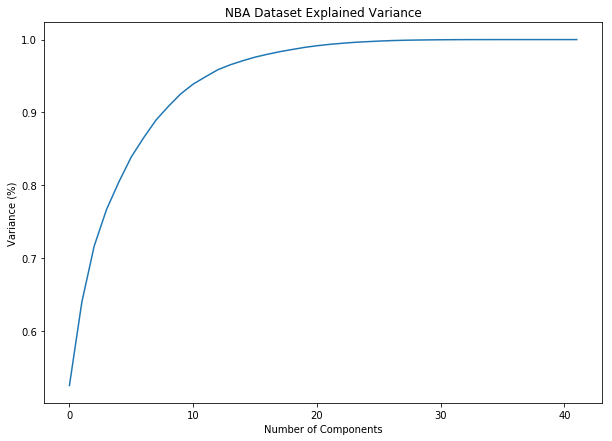

In [210]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(10,7))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('NBA Dataset Explained Variance')
plt.show()

It appears that over 90% of our data is explained by 10 components, while close to 100% is explained by 30 components. So, we'll choose 30 components to train our data.

In [211]:
# Fit the data using 30 components
pcanc = PCA(n_components=30)
nbapca = pca.fit_transform(nbasubrescaled)

In [229]:
# Split the data for training and testing using the default 80/20 split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
Xtrainl, Xtestl, ytrainl, ytestl = train_test_split(nbanosal, nbasub2['Salary'], random_state=5)

In [230]:
# Fit the data to standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrainl = sc.fit_transform(Xtrainl)
Xtestl = sc.transform(Xtestl)

C:\Users\K\Anaconda373\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\K\Anaconda373\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [231]:
from sklearn.decomposition import PCA

pcal = PCA(n_components=30)
Xtrainl = pca.fit_transform(Xtrainl)
Xtestl = pca.transform(Xtestl)

In [233]:
# Fit the adjusted dataset to a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train regression model on training data 
regr = LinearRegression()
regr.fit(Xtrainl, ytrainl)
# Prediction with test data
pred = regr.predict(Xtestl)
print(mean_squared_error(ytestl, pred))
print(r2_score(ytestl,pred))

8248491355617.081
0.5778682264546522


While we do get a 10% increase in the r-squared value, this is still well below the ability to predict a salary accurately. There may be several reasons why we may never achieve high accuracy values given this dataset:

1. Recall from our previous work on this dataset, there is some bias. Namely, the dataset only includes players whose careers beganin 1991 and after. So, many players who played in their early '90s but began their careers in the '80s were not included. This may decrease our accuracy. However, this is probably the least likely reason for low accuracy. 

2. A stronger reason is that stats haven't increased at the same rate as salaries. In other words, while average salaries have increased substantially since the 1990s, many statistical values have not increased at the same rate. As we saw in a heatmap in a previous project, most correlations with salary were fairly low, rarely being greater than 60%. As such the model would have a difficult time projecting stats to salary values because players are being paid substantially higher wages for only slightly better statistical output. 

3. Another possible reason may be inflation. The inflation rate in the U.S. has varied throughout the years, but salaries in 1990s would greater if the inflation rate were taken into consideration. However, this approach still may not make our model very accurate. In the U.S., salaries have never kept pace with the rate of inflation. Even as inflation has increased, salaries have remained largely stagnant. Yet, there's little reason to believe that NBA salaries have much to do with inflation at all. As suggested below, the NBA often lives inside it's own little bubble where salaries get dictated by a number of factors not necessarily related to current economic climates.   

4. There may be variety of factors where players may be underpaid or overpaid. For exmample, teams competing with one another over particular players in a given situation drive up the price of a player in such a way that such an increase may not be warranted outside of that context (such as playoff contenders needing to pick up last minute help, a team looking to rebuild during the offseason with very few strong free agents to choose from, etc). There are also considerations of labor union influenced league minimums, which have lead to average salary increases, regardless of player skill. Player popularity may also play a role as teams may be eager to cash in on advertising and ticket sales from a popular player, often resulting in a player getting paid more that his statistical output may warrant. Additionally, as the NBA has become a global brand over the last decade, more money has flowed into the organization, resulting in part to much  of that money being distributed to players.  

All of these various factors make it difficult to predict salary simply from stats. In fact, without datasets that took into account many of the factors mentioned above, we likely couldn't ever make an accurate model for this particular question. 

### Predicting Player Position based on Salary and Statisitcal Output

We'll begin by doing a basic logistic regression to see how well we can do without any real tampering of the dataset.

We expect higher accuracy for this question than our previous question due to the fact that there are substantial differences between positions. For instance, point guards average more assists, while centers and power forwards have higher numbers of blocks. Also, as we found in a previous project, point guards average a lower salary than any other position, particularly centers and guards.

In [181]:
#New dataset without any categorical values
nbasub4 = nbadf.drop(['Unnamed: 0', "Player", "Team", 'year_start', 'year_end'], axis=1)
nbasub4.head(10)

,Year,Salary,Pos,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG,career_len
0,1991,395000,PF,22.0,43.0,0.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.000,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,3.1,4
1,1992,494000,PF,23.0,71.0,1.0,934.0,13.5,0.533,0.000,0.280,9.5,20.9,15.2,4.7,1.3,1.1,14.0,20.6,0.6,1.5,2.1,0.110,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,0.000,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,6.1,4
2,1993,500000,PF,24.0,75.0,52.0,1311.0,13.2,0.551,0.002,0.245,11.0,18.1,14.6,3.0,1.0,1.2,15.6,20.5,0.7,1.3,2.0,0.074,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.000,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,7.7,4
3,1994,805000,PF,25.0,13.0,0.0,159.0,9.2,0.485,0.000,0.455,8.5,24.2,16.3,2.7,0.6,1.2,20.5,22.6,-0.2,0.1,-0.1,-0.032,-7.1,-3.1,-10.2,-0.3,24.0,55.0,0.436,0.0,0.0,0.000,24.0,55.0,0.436,0.436,16.0,25.0,0.640,12.0,34.0,46.0,3.0,2.0,3.0,17.0,20.0,64.0,4.9,4
4,1995,650000,PF,26.0,54.0,0.0,506.0,12.6,0.519,0.009,0.152,8.7,17.4,13.1,5.0,1.5,1.8,15.4,25.6,-0.4,0.7,0.3,0.027,-4.6,-1.7,-6.3,-0.6,118.0,231.0,0.511,0.0,2.0,0.000,118.0,229.0,0.515,0.511,20.0,35.0,0.571,37.0,77.0,114.0,13.0,15.0,12.0,45.0,104.0,256.0,4.7,4
5,1991,1660000,PG,21.0,67.0,19.0,1505.0,12.2,0.448,0.099,0.097,1.9,6.0,3.8,19.2,1.5,0.1,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,417.0,1009.0,0.413,24.0,100.0,0.240,393.0,909.0,0.432,0.425,84.0,98.0,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,14.1,10
6,1992,2008000,PG,22.0,81.0,11.0,1538.0,12.6,0.469,0.111,0.128,1.5,6.8,4.0,21.0,1.4,0.2,11.6,26.7,-0.2,0.8,0.6,0.018,-1.7,-3.5,-5.2,-1.3,356.0,845.0,0.421,31.0,94.0,0.330,325.0,751.0,0.433,0.440,94.0,108.0,0.870,22.0,92.0,114.0,192.0,44.0,4.0,117.0,130.0,837.0,10.3,10
7,1993,2358000,PG,23.0,81.0,81.0,2710.0,15.6,0.515,0.140,0.165,2.0,6.8,4.4,20.8,1.5,0.2,11.0,25.5,3.0,2.2,5.1,0.091,1.1,-2.1,-1.0,0.7,633.0,1407.0,0.450,70.0,197.0,0.355,563.0,1210.0,0.465,0.475,217.0,232.0,0.935,51.0,174.0,225.0,344.0,84.0,8.0,187.0,179.0,1553.0,19.2,10
8,1994,1825000,PG,24.0,80.0,78.0,2617.0,16.7,0.521,0.104,0.179,1.2,5.8,3.6,24.1,1.6,0.2,9.9,24.9,4.4,2.4,6.8,0.125,1.6,-2.1,-0.6,0.9,588.0,1279.0,0.460,42.0,133.0,0.316,546.0,1146.0,0.476,0.476,219.0,229.0,0.956,27.0,141.0,168.0,362.0,82.0,10.0,151.0,150.0,1437.0,18.0,10
9,1995,2200000,PG,25.0,73.0,43.0,2082.0,17.8,0.543,0.214,0.155,1.9,5.9,3.9,23.0,1.9,0.3,10.0,25.8,3.8,1.3,5.0,0.115,2.2,-2.8,-0.6,0.7,472.0,1005.0,0.470,83.0,215.0,0.386,389.0,790.0,0.492,0.511,138.0,156.0,0.885,32.0,105.0,137.0,263.0,77.0,9.0,119.0,126.0,1165.0,16.0,10


In [184]:
# Drop position
nbasub5 = nbasub4.drop(['Pos'], axis=1)
nbasub5.head(10)

,Year,Salary,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG,career_len
0,1991,395000,22.0,43.0,0.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,0.0,0.5,0.5,0.079,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.000,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,3.1,4
1,1992,494000,23.0,71.0,1.0,934.0,13.5,0.533,0.000,0.280,9.5,20.9,15.2,4.7,1.3,1.1,14.0,20.6,0.6,1.5,2.1,0.110,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,0.000,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,6.1,4
2,1993,500000,24.0,75.0,52.0,1311.0,13.2,0.551,0.002,0.245,11.0,18.1,14.6,3.0,1.0,1.2,15.6,20.5,0.7,1.3,2.0,0.074,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.000,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,7.7,4
3,1994,805000,25.0,13.0,0.0,159.0,9.2,0.485,0.000,0.455,8.5,24.2,16.3,2.7,0.6,1.2,20.5,22.6,-0.2,0.1,-0.1,-0.032,-7.1,-3.1,-10.2,-0.3,24.0,55.0,0.436,0.0,0.0,0.000,24.0,55.0,0.436,0.436,16.0,25.0,0.640,12.0,34.0,46.0,3.0,2.0,3.0,17.0,20.0,64.0,4.9,4
4,1995,650000,26.0,54.0,0.0,506.0,12.6,0.519,0.009,0.152,8.7,17.4,13.1,5.0,1.5,1.8,15.4,25.6,-0.4,0.7,0.3,0.027,-4.6,-1.7,-6.3,-0.6,118.0,231.0,0.511,0.0,2.0,0.000,118.0,229.0,0.515,0.511,20.0,35.0,0.571,37.0,77.0,114.0,13.0,15.0,12.0,45.0,104.0,256.0,4.7,4
5,1991,1660000,21.0,67.0,19.0,1505.0,12.2,0.448,0.099,0.097,1.9,6.0,3.8,19.2,1.5,0.1,9.5,27.2,-0.7,-0.3,-1.0,-0.031,-1.7,-4.4,-6.1,-1.6,417.0,1009.0,0.413,24.0,100.0,0.240,393.0,909.0,0.432,0.425,84.0,98.0,0.857,34.0,87.0,121.0,206.0,55.0,4.0,110.0,149.0,942.0,14.1,10
6,1992,2008000,22.0,81.0,11.0,1538.0,12.6,0.469,0.111,0.128,1.5,6.8,4.0,21.0,1.4,0.2,11.6,26.7,-0.2,0.8,0.6,0.018,-1.7,-3.5,-5.2,-1.3,356.0,845.0,0.421,31.0,94.0,0.330,325.0,751.0,0.433,0.440,94.0,108.0,0.870,22.0,92.0,114.0,192.0,44.0,4.0,117.0,130.0,837.0,10.3,10
7,1993,2358000,23.0,81.0,81.0,2710.0,15.6,0.515,0.140,0.165,2.0,6.8,4.4,20.8,1.5,0.2,11.0,25.5,3.0,2.2,5.1,0.091,1.1,-2.1,-1.0,0.7,633.0,1407.0,0.450,70.0,197.0,0.355,563.0,1210.0,0.465,0.475,217.0,232.0,0.935,51.0,174.0,225.0,344.0,84.0,8.0,187.0,179.0,1553.0,19.2,10
8,1994,1825000,24.0,80.0,78.0,2617.0,16.7,0.521,0.104,0.179,1.2,5.8,3.6,24.1,1.6,0.2,9.9,24.9,4.4,2.4,6.8,0.125,1.6,-2.1,-0.6,0.9,588.0,1279.0,0.460,42.0,133.0,0.316,546.0,1146.0,0.476,0.476,219.0,229.0,0.956,27.0,141.0,168.0,362.0,82.0,10.0,151.0,150.0,1437.0,18.0,10
9,1995,2200000,25.0,73.0,43.0,2082.0,17.8,0.543,0.214,0.155,1.9,5.9,3.9,23.0,1.9,0.3,10.0,25.8,3.8,1.3,5.0,0.115,2.2,-2.8,-0.6,0.7,472.0,1005.0,0.470,83.0,215.0,0.386,389.0,790.0,0.492,0.511,138.0,156.0,0.885,32.0,105.0,137.0,263.0,77.0,9.0,119.0,126.0,1165.0,16.0,10


We'll start by running a basic logistic regression without using tuning parameters such as cross validation or grid search. 

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xtrain, Xtest, ytrain, ytest = train_test_split(nbasub5.values, 
                                              (nbasub4.Pos == "PF").values,random_state=5)

clf = LogisticRegression()
# Fit the model on the training data.
clf.fit(Xtrain, ytrain)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtest), ytest))

C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7813798836242727


In [187]:
# Use a for loop to find the accuracy for every position
for x in nbasub4['Pos'].unique():
    Xtrain, Xtest, ytrain, ytest = train_test_split(nbasub5.values, 
                                              (nbasub4.Pos == x).values,random_state=5)

    clf = LogisticRegression()
# Fit the model on the training data.
    clf.fit(Xtrain, ytrain)
# Print the accuracy from the testing data.
    print(x + " " + str(accuracy_score(clf.predict(Xtest), ytest)))

C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


PF 0.7813798836242727


C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


PG 0.8682460515378221


C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SG 0.8104738154613467


C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SF 0.815876974231089


C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C 0.8129675810473815


We'll next apply a K-fold cross validation model that applies a scoring function to each fold. Accuracy is the default scoring function.

In [188]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

Below, we apply cv_score without using a regularization parameter, C, but still notice a slight improvement in accuracy.

In [189]:
clf = LogisticRegression()
score = cv_score(clf, Xtrain, ytrain)
print(score)

C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

0.8230076230076231


To control for any high regression coefficients, we'll introduce a regularization parameter, C. However, we first need to determine the best value of C to use. We'll try several to find out which is the most accurate. 

In [190]:
# Find the highest average score using various C values
Cs = [0.001, 0.1, 1, 10, 100]
from sklearn.linear_model import LogisticRegression
high_score = 0

# # Run logistic regression on just training data for each C value and print highest average score and corresponding C. 
for C in Cs:
        clf = LogisticRegression(C = C)
        score = cv_score(clf, Xtrain, ytrain)
        if score > high_score:
            high_score = score
            top_C = C
print("The highest score is " + str(high_score) + " for the C value of " + str(top_C))

C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

The highest score is 0.8230076230076231 for the C value of 0.001


We'll now run our regression model again using our newly acquired C value.

In [191]:
# Run logistic regression on training data using C obtained earlier
clfc = LogisticRegression(C = top_C)
clfc.fit(Xtrain, ytrain)
ypred = clfc.predict(Xtest)
accsco = accuracy_score(ypred, ytest)
print("The accuracy score for C = " + str(top_C) + " is " + str(accsco))

C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy score for C = 0.001 is 0.8129675810473815


It appears that our regularization parameter failed to make much of a difference to our accuracy. We'll next try grid search in hopes that it will find a better value of C.  

In [192]:
# Use GridSearchCV for finding the best C value
from sklearn.model_selection import GridSearchCV
clfc2=LogisticRegression()
parameters = {"C": [0.0001, 0.001, 0.1, 1, 10, 100]}
fitmodel = GridSearchCV(clfc2, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(Xtrain, ytrain)
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_ #, fitmodel.cv_results_

C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

(LogisticRegression(C=0.0001, class_weight=None, dual=False,
           fit_intercept=True, intercept_scaling=1, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
           solver='warn', tol=0.0001, verbose=0, warm_start=False),
 {'C': 0.0001},
 0.8224532224532225)

Grid search resulted in a smaller C value. Let's try using it on our test set. 

In [193]:
# Running GridSearchCV's C value on the test set
clfc2=LogisticRegression(C=fitmodel.best_params_['C'])
clfc2.fit(Xtrain, ytrain)
ypred2=clfc2.predict(Xtest)
accsco2 = accuracy_score(ypred2, ytest)
print("The accuracy score for C = 0.0001 is " + str(accsco2))

C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy score for C = 0.0001 is 0.8129675810473815


The accuracy appears to be the same as both our model without C as well as the C chosen through cross validation.

Next, we'll try KNN and SVC to see if they offer better results.

In [194]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [261]:
SVC_model = SVC(C=0.001, random_state=5)
KNN_model = KNeighborsClassifier(n_neighbors=30)

In [262]:
SVC_model.fit(Xtrain, ytrain)
KNN_model.fit(Xtrain, ytrain)

C:\Users\K\Anaconda373\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')

In [263]:
SVC_prediction = SVC_model.predict(Xtest)
KNN_prediction = KNN_model.predict(Xtest)

In [264]:
# Accuracy score is the simplest way to evaluate
print(accuracy_score(SVC_prediction, ytest))
print(accuracy_score(KNN_prediction, ytest))
# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(SVC_prediction, ytest))
print(classification_report(KNN_prediction, ytest))

0.7871986699916874
0.7830423940149626
[[1894  512]
 [   0    0]]
              precision    recall  f1-score   support

       False       0.99      0.79      0.88      2394
        True       0.00      0.08      0.00        12

   micro avg       0.78      0.78      0.78      2406
   macro avg       0.50      0.43      0.44      2406
weighted avg       0.99      0.78      0.87      2406



The accuracy score hasn't improved at all with these two models. Next, we'll try comparing several different models at once 
to see if any of them appear more promising than the others.

C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

LR: 0.822738 (0.013376)


C:\Users\K\Anaconda373\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\K\Anaconda373\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\K\Anaconda373\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\K\Anaconda373\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\K\Anaconda373\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\K\Anaconda373\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\K\Anaconda373\lib\site-pa

LDA: 0.874848 (0.013062)
KNN: 0.773672 (0.012263)
CART: 0.843808 (0.016413)


C:\Users\K\Anaconda373\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarni

RAN: 0.874019 (0.011419)
NB: 0.731544 (0.042047)


C:\Users\K\Anaconda373\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The 

SVM: 0.796683 (0.014365)


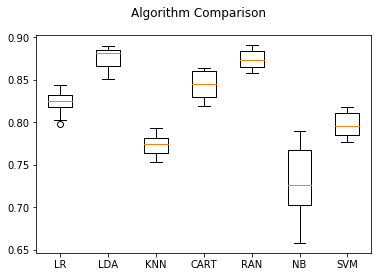

In [265]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = pandas.read_csv(url, names=names)
#array = dataframe.values
X = Xtrain
Y = ytrain
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RAN', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Linear Discriminant Analysis and Random Forest Classifier appear to be the promising models for our dataset, so we'll proceed with both of them

We'll begin with Random Forest

In [199]:
#Creating the dependent variable class
factor = pd.factorize(nbasub4['Pos'])
nbasub4.Pos = factor[0]
definitions = factor[1]
print(nbasub4.Pos.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: Pos, dtype: int64
Index(['PF', 'PG', 'SG', 'SF', 'C'], dtype='object')


In [200]:
X_train, X_test, y_train, y_test = train_test_split(nbasub, nbasub2['Pos'], test_size = 0.25, random_state = 5)

In [201]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\K\Anaconda373\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\K\Anaconda373\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\K\Anaconda373\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [202]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 5)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

In [203]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual Position'], colnames=['Predicted Position']))
print(accuracy_score(y_test, y_pred))

Predicted Position    0    1    2    3    4
Actual Position                            
0                   256    1   23  114  133
1                     3  383   60   16    4
2                    21   73  276   85    3
3                    64   11  126  228   14
4                   111    0    3   19  379
0.6325852036575229


It seems that the accuracy for Random Forest is actually lower than our original Logistic Regression, despite what our algorithim comparison suggested. We'll try Linear Discriminant Analysis next.

In [234]:
# Use Label Encoder to change position values to numbers
from sklearn.preprocessing import LabelEncoder

X = nbasub5.values
y = nbasub4['Pos'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label = {1: 'PG', 2: 'SG', 3:'SF', 4: 'PF', 5: 'C'}


In [238]:
# Import LDA and fitit to the data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=30)
nbalda = lda.fit_transform(nbasub5.values, nbasub4['Pos'])


C:\Users\K\Anaconda373\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [249]:
# A function to plot the data based on an LDA analysis
def plot_scikit_lda(X, title):
    
    plt.figure(figsize=(15,9))
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,6),('^', 's', 'o', '*', '+'),('blue', 'red', 'green', 'purple', 'yellow')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])
 
    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()


C:\Users\K\Anaconda373\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\K\Anaconda373\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\K\Anaconda373\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\K\Anaconda373\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning

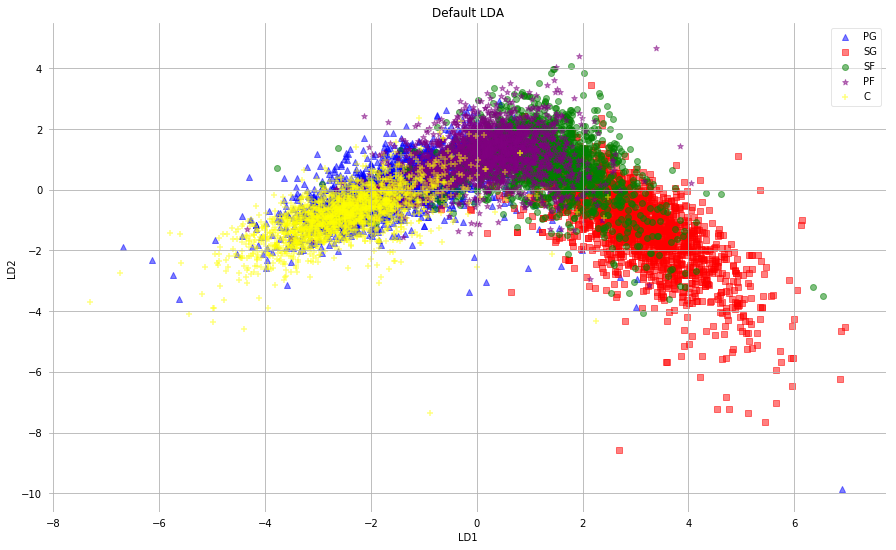

In [250]:
plot_scikit_lda(nbalda, title='Default LDA')

In [266]:
# A function to graph fitting the data to 30 PCA components
from sklearn.decomposition import PCA 

pca3 = PCA(n_components=30)
nbapca = pca3.fit_transform(nbasub5)

def plot_pca():

    plt.figure(figsize=(15,9))
    ax = plt.subplot(111)

    for label,marker,color in zip(
         range(1,6),('^', 's', 'o', '*', '+'),('blue', 'red', 'green', 'purple', 'yellow')):

        plt.scatter(x=nbapca[:,0][y == label],
                y=nbapca[:,1][y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('PCA: NBA position projection on 30 principal components')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.tight_layout
    plt.grid()

    plt.show()


C:\Users\K\Anaconda373\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\K\Anaconda373\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\K\Anaconda373\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\K\Anaconda373\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning

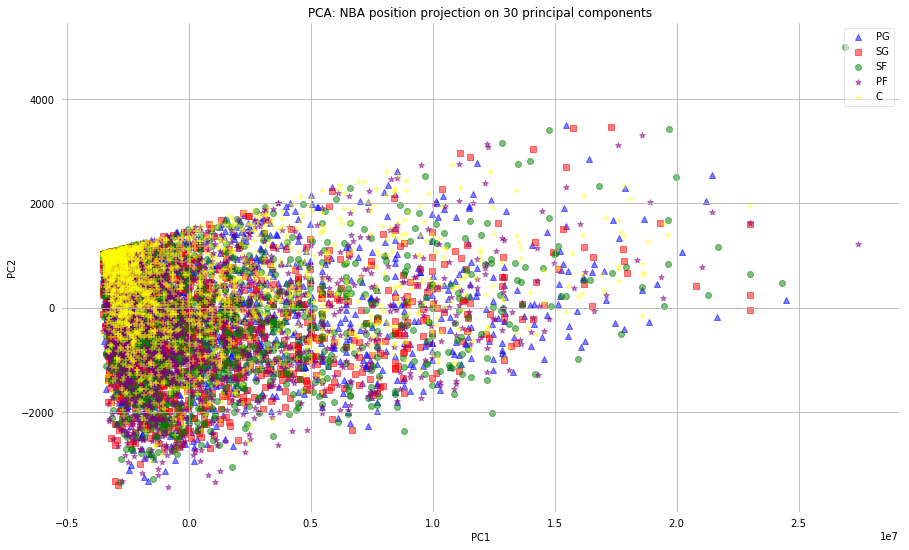

In [267]:
plot_pca()